In [1]:
import os

import pandas as pd

import numpy as np

from sklearn.decomposition import PCA

import matplotlib as mp

import matplotlib.pyplot as plt

from sklearn.metrics import r2_score, mean_squared_error



from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

from sklearn.metrics import accuracy_score

from sklearn.metrics import f1_score

from sklearn.metrics import classification_report

import time

from eod import EodHistoricalData

In [12]:
YOUR_API_TOKEN=''
limit=100000
ticker='AAPL.US'

In [13]:
client=EodHistoricalData(YOUR_API_TOKEN)

In [14]:
dir(client)

['URL_BONDS_FUNDAMENTALS',
 'URL_BULK_FUNDAMENTALS',
 'URL_BULK_MARKET',
 'URL_DIVIDENDS',
 'URL_EARNINGS',
 'URL_ECONOMIC_EVENT_DATA',
 'URL_EXCHANGES_LIST',
 'URL_EXCH_SYMBOLS_LIST',
 'URL_FINANCIAL_NEWS',
 'URL_FUNDAMENTAL',
 'URL_INSIDER',
 'URL_INSTRUMENT_SCREENER',
 'URL_INTRADAY_STOCKS',
 'URL_IPOS',
 'URL_LIVE_STOCKS',
 'URL_MACRO',
 'URL_MARKET_CAP',
 'URL_MARKET_HOURS',
 'URL_OPTIONS',
 'URL_SEARCH_INSTRUMENT',
 'URL_SENTIMENT_DATA',
 'URL_SPLITS',
 'URL_SPLITS_CALENDAR',
 'URL_STOCK_PRICES',
 'URL_TA',
 'URL_TRENDS',
 'URL_TWEETS_SENTIMENT',
 '_RequestHandler__append_fmt',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'api_key',
 'get_bulk_markets',
 'get_

In [15]:
import datetime

import requests_cache

expire_after = datetime.timedelta(days=1)

session = requests_cache.CachedSession(cache_name='cache', backend='sqlite', expire_after=expire_after)


In [37]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# set your API token and endpoint URL
api_token = '643a6dfb3d37a3.49857790'
url = 'https://eodhistoricaldata.com/api/news/'

# set the query parameters for the news search
params = {
    'api_token': api_token,
    'limit': 1000,
    'symbols': 'US',
}

# set up a dictionary to store the dataframes for each day
df_dict = {}

# loop through the last 100 days and make the API call for each day
for i in range(100):
    # set the start and end dates for the news search
    end_date = datetime.now() - timedelta(days=i)
    start_date = end_date - timedelta(days=1)
    params['from'] = start_date.strftime('%Y-%m-%d')
    params['to'] = end_date.strftime('%Y-%m-%d')

    # make a GET request to the news endpoint with the query parameters
    response = requests.get(url, params=params)

    # parse the response JSON into a dataframe and add it to the dictionary
    data = response.json()
    df_dict[end_date.strftime('%Y-%m-%d')] = pd.DataFrame(data)

# concatenate all the dataframes in the dictionary into one final dataframe
final_df = pd.concat(df_dict.values())

# print the final dataframe
print(final_df)


                          date  \
0    2023-05-09T13:23:00+00:00   
1    2023-05-09T13:23:00+00:00   
2    2023-05-09T13:22:00+00:00   
3    2023-05-09T13:22:00+00:00   
4    2023-05-09T13:22:00+00:00   
..                         ...   
995  2023-01-30T15:46:16+00:00   
996  2023-01-30T15:46:01+00:00   
997  2023-01-30T15:45:48+00:00   
998  2023-01-30T15:45:00+00:00   
999  2023-01-30T15:45:00+00:00   

                                                 title  \
0    Returnable Packaging Global Market Report 2023...   
1    Global Kosher Beef Market Share and Demand Exp...   
2    Workiva Partners with Code.org to Narrow the D...   
3          Pacman LSD Finance: the LSD War on Arbitrum   
4    Plant Milk Market Is Expected to Reach $30 bil...   
..                                                 ...   
995  Comcast Corporation (NASDAQ:CMCSA) Q4 2022 Ear...   
996  First Merchants Corporation (NASDAQ:FRME) Q4 2...   
997  Alphabet earnings: Expect ‘continued weakness ...   
998  Global

In [38]:
final_df

,date,title,content,link,symbols,tags,sentiment
0,2023-05-09T13:23:00+00:00,Returnable Packaging Global Market Report 2023...,"Dublin, May 09, 2023 (GLOBE NEWSWIRE) -- The...",https://www.globenewswire.com/news-release/202...,[],"[INTERMEDIATE BULK CONTAINER, PACKAGING, PACKA...","{'polarity': 0.997, 'neg': 0.014, 'neu': 0.884..."
1,2023-05-09T13:23:00+00:00,Global Kosher Beef Market Share and Demand Exp...,"NEW YORK, United States, May 09, 2023 (GLOBE...",https://www.globenewswire.com/news-release/202...,[],"[ANALYST RECOMMENDATIONS, DERIVATIVE MARKET IN...","{'polarity': 0.999, 'neg': 0.019, 'neu': 0.889..."
2,2023-05-09T13:22:00+00:00,Workiva Partners with Code.org to Narrow the D...,"NEW YORK, May 09, 2023--(BUSINESS WIRE)--Worki...",https://finance.yahoo.com/news/workiva-partner...,"[0WKA.F, WK.US]",[],"{'polarity': 0.999, 'neg': 0.005, 'neu': 0.818..."
3,2023-05-09T13:22:00+00:00,Pacman LSD Finance: the LSD War on Arbitrum,"Singapore, May 09, 2023 (GLOBE NEWSWIRE) -- ...",https://www.globenewswire.com/news-release/202...,[],[COMPANY ANNOUNCEMENT],"{'polarity': 0.997, 'neg': 0.012, 'neu': 0.849..."
4,2023-05-09T13:22:00+00:00,Plant Milk Market Is Expected to Reach $30 bil...,"Farmington, May 09, 2023 (GLOBE NEWSWIRE) --...",https://www.globenewswire.com/news-release/202...,[],"[BOTTLES, CARTOONS, MARKET RESEARCH REPORTS, O...","{'polarity': 0.999, 'neg': 0.016, 'neu': 0.899..."
...,...,...,...,...,...,...,...
995,2023-01-30T15:46:16+00:00,Comcast Corporation (NASDAQ:CMCSA) Q4 2022 Ear...,Comcast Corporation (NASDAQ:CMCSA) Q4 2022 Ear...,https://finance.yahoo.com/news/comcast-corpora...,"[CMCS34.SA, CMCSA.MX, CMCSA.US, CTP2.F]","[BRIAN ROBERTS, BROADBAND NETWORK, COMCAST BUS...","{'polarity': 1, 'neg': 0.023, 'neu': 0.794, 'p..."
996,2023-01-30T15:46:01+00:00,First Merchants Corporation (NASDAQ:FRME) Q4 2...,First Merchants Corporation (NASDAQ:FRME) Q4 2...,https://finance.yahoo.com/news/first-merchants...,[FRME.US],"[BASIS POINTS, FIRST MERCHANTS CORPORATION, FO...","{'polarity': 1, 'neg': 0.016, 'neu': 0.806, 'p..."
997,2023-01-30T15:45:48+00:00,Alphabet earnings: Expect ‘continued weakness ...,Morningstar Senior Equity Analyst Ali Mogharab...,https://finance.yahoo.com/video/alphabet-earni...,"[ABEA.F, ABEA.XETRA, ABEC.F, ABEC.XETRA, GOGL3...","[DIGITAL ADVERTISING, ENVIRONMENT UNCERTAINTY,...","{'polarity': 0.999, 'neg': 0.034, 'neu': 0.83,..."
998,2023-01-30T15:45:00+00:00,Global Bag Filters Market to Reach $13.1 Billi...,"New York, Jan. 30, 2023 (GLOBE NEWSWIRE) -- ...",https://www.globenewswire.com/news-release/202...,[],"[MARKET RESEARCH REPORTS, REPORTLINKER]","{'polarity': 0.999, 'neg': 0.011, 'neu': 0.953..."


In [41]:
import pickle

# save final_df as a pickle file
with open('final_df.pickle', 'wb') as f:
    pickle.dump(final_df, f)

# load final_df from the pickle file
with open('final_df.pickle', 'rb') as f:
    final_df_loaded = pickle.load(f)

# print the loaded dataframe to confirm it's the same as the original
print(final_df_loaded)


                          date  \
0    2023-05-09T13:23:00+00:00   
1    2023-05-09T13:23:00+00:00   
2    2023-05-09T13:22:00+00:00   
3    2023-05-09T13:22:00+00:00   
4    2023-05-09T13:22:00+00:00   
..                         ...   
995  2023-01-30T15:46:16+00:00   
996  2023-01-30T15:46:01+00:00   
997  2023-01-30T15:45:48+00:00   
998  2023-01-30T15:45:00+00:00   
999  2023-01-30T15:45:00+00:00   

                                                 title  \
0    Returnable Packaging Global Market Report 2023...   
1    Global Kosher Beef Market Share and Demand Exp...   
2    Workiva Partners with Code.org to Narrow the D...   
3          Pacman LSD Finance: the LSD War on Arbitrum   
4    Plant Milk Market Is Expected to Reach $30 bil...   
..                                                 ...   
995  Comcast Corporation (NASDAQ:CMCSA) Q4 2022 Ear...   
996  First Merchants Corporation (NASDAQ:FRME) Q4 2...   
997  Alphabet earnings: Expect ‘continued weakness ...   
998  Global

In [42]:
final_df_loaded

,date,title,content,link,symbols,tags,sentiment
0,2023-05-09T13:23:00+00:00,Returnable Packaging Global Market Report 2023...,"Dublin, May 09, 2023 (GLOBE NEWSWIRE) -- The...",https://www.globenewswire.com/news-release/202...,[],"[INTERMEDIATE BULK CONTAINER, PACKAGING, PACKA...","{'polarity': 0.997, 'neg': 0.014, 'neu': 0.884..."
1,2023-05-09T13:23:00+00:00,Global Kosher Beef Market Share and Demand Exp...,"NEW YORK, United States, May 09, 2023 (GLOBE...",https://www.globenewswire.com/news-release/202...,[],"[ANALYST RECOMMENDATIONS, DERIVATIVE MARKET IN...","{'polarity': 0.999, 'neg': 0.019, 'neu': 0.889..."
2,2023-05-09T13:22:00+00:00,Workiva Partners with Code.org to Narrow the D...,"NEW YORK, May 09, 2023--(BUSINESS WIRE)--Worki...",https://finance.yahoo.com/news/workiva-partner...,"[0WKA.F, WK.US]",[],"{'polarity': 0.999, 'neg': 0.005, 'neu': 0.818..."
3,2023-05-09T13:22:00+00:00,Pacman LSD Finance: the LSD War on Arbitrum,"Singapore, May 09, 2023 (GLOBE NEWSWIRE) -- ...",https://www.globenewswire.com/news-release/202...,[],[COMPANY ANNOUNCEMENT],"{'polarity': 0.997, 'neg': 0.012, 'neu': 0.849..."
4,2023-05-09T13:22:00+00:00,Plant Milk Market Is Expected to Reach $30 bil...,"Farmington, May 09, 2023 (GLOBE NEWSWIRE) --...",https://www.globenewswire.com/news-release/202...,[],"[BOTTLES, CARTOONS, MARKET RESEARCH REPORTS, O...","{'polarity': 0.999, 'neg': 0.016, 'neu': 0.899..."
...,...,...,...,...,...,...,...
995,2023-01-30T15:46:16+00:00,Comcast Corporation (NASDAQ:CMCSA) Q4 2022 Ear...,Comcast Corporation (NASDAQ:CMCSA) Q4 2022 Ear...,https://finance.yahoo.com/news/comcast-corpora...,"[CMCS34.SA, CMCSA.MX, CMCSA.US, CTP2.F]","[BRIAN ROBERTS, BROADBAND NETWORK, COMCAST BUS...","{'polarity': 1, 'neg': 0.023, 'neu': 0.794, 'p..."
996,2023-01-30T15:46:01+00:00,First Merchants Corporation (NASDAQ:FRME) Q4 2...,First Merchants Corporation (NASDAQ:FRME) Q4 2...,https://finance.yahoo.com/news/first-merchants...,[FRME.US],"[BASIS POINTS, FIRST MERCHANTS CORPORATION, FO...","{'polarity': 1, 'neg': 0.016, 'neu': 0.806, 'p..."
997,2023-01-30T15:45:48+00:00,Alphabet earnings: Expect ‘continued weakness ...,Morningstar Senior Equity Analyst Ali Mogharab...,https://finance.yahoo.com/video/alphabet-earni...,"[ABEA.F, ABEA.XETRA, ABEC.F, ABEC.XETRA, GOGL3...","[DIGITAL ADVERTISING, ENVIRONMENT UNCERTAINTY,...","{'polarity': 0.999, 'neg': 0.034, 'neu': 0.83,..."
998,2023-01-30T15:45:00+00:00,Global Bag Filters Market to Reach $13.1 Billi...,"New York, Jan. 30, 2023 (GLOBE NEWSWIRE) -- ...",https://www.globenewswire.com/news-release/202...,[],"[MARKET RESEARCH REPORTS, REPORTLINKER]","{'polarity': 0.999, 'neg': 0.011, 'neu': 0.953..."


In [39]:
import requests

# make a GET request to the account status endpoint
url = f'https://eodhistoricaldata.com/api/user/?api_token={YOUR_API_TOKEN}'
response = requests.get(url)

# parse the response JSON and print the remaining requests count
user_data = response.json()
remaining_requests = user_data['dailyRateLimit']
print(f'You have {remaining_requests} requests left for today')

You have 20 requests left for today


In [40]:
final_df.to_csv("df_test.csv")

In [93]:
# read financial phrasebook dataset into a csv
input_df = pd.read_csv('Sentences_50Agree.txt', engine='python', sep=".@", header=None, encoding="ISO-8859-1", names=['text','label'])

In [94]:
input_df

,text,label
0,"According to Gran , the company has no plans t...",neutral
1,Technopolis plans to develop in stages an area...,neutral
2,The international electronic industry company ...,negative
3,With the new production plant the company woul...,positive
4,According to the company 's updated strategy f...,positive
...,...,...
4841,LONDON MarketWatch -- Share prices ended lower...,negative
4842,Rinkuskiai 's beer sales fell by 6.5 per cent ...,neutral
4843,Operating profit fell to EUR 35.4 mn from EUR ...,negative
4844,Net sales of the Paper segment decreased to EU...,negative


In [95]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer

In [96]:
# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(input_df['text'])

In [97]:
vectorizer.get_feature_names_out()

array(['00', '000', '000063', ..., 'ñtehuolto', 'óeur', 'úo'],
      dtype=object)

In [98]:
X

<4846x9825 sparse matrix of type '<class 'numpy.int64'>'
	with 57682 stored elements in Compressed Sparse Row format>

In [99]:
len(pca.explained_variance_ratio_[pca.explained_variance_ratio_ > 0.01])

5

In [100]:
pca.explained_variance_ratio_

array([0.04073737, 0.01950488, 0.01464113, 0.01262215, 0.01002852])

In [101]:
X_pca

array([[-0.40900356,  0.22551357, -0.82869442, -0.95741838,  1.18223666],
       [-0.33415951,  0.09247226, -0.0870813 , -0.05157848, -0.3777641 ],
       [-0.37658142,  0.30962833, -0.84555519, -0.93971729,  1.19363558],
       ...,
       [ 3.92958042, -0.97588036,  0.44945418, -0.77108472,  0.09082761],
       [ 5.764063  , -0.85750292,  0.26788143, -0.89492679,  0.08293205],
       [-0.07800524,  0.02220519,  0.15869252,  0.48601555,  0.60659499]])

Number of components to retain: 5


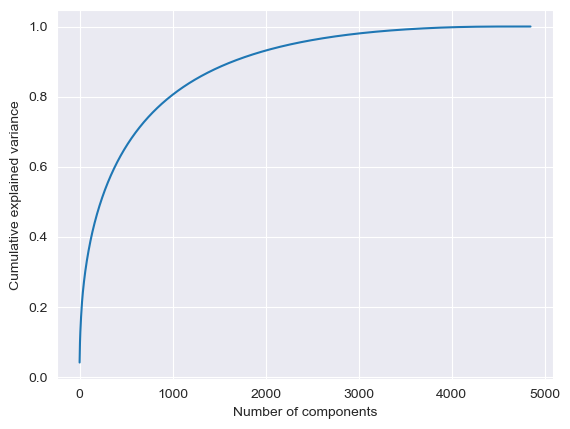

In [102]:
# Perform PCA and determine optimal number of components
pca = PCA()
X_pca = pca.fit_transform(X.toarray())

# Determine number of components to retain
n_components = len(pca.explained_variance_ratio_[pca.explained_variance_ratio_ > 0.01])
print(f"Number of components to retain: {n_components}")

# Plot explained variance by number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


In [103]:
# Perform PCA on the vectorized data
pca = PCA(n_components=5)
pca.fit(X.toarray())
X_pca = pca.transform(X.toarray())

In [104]:
# Add the PCA results to the original DataFrame
input_df['pca1'] = X_pca[:, 0]
input_df['pca2'] = X_pca[:, 1]
input_df['pca3'] = X_pca[:, 2]
input_df['pca4'] = X_pca[:, 3]
input_df['pca5'] = X_pca[:, 4]



In [105]:
input_df

,text,label,pca1,pca2,pca3,pca4,pca5
0,"According to Gran , the company has no plans t...",neutral,-0.409004,0.225518,-0.828635,-0.957495,1.183419
1,Technopolis plans to develop in stages an area...,neutral,-0.334160,0.092461,-0.087392,-0.051794,-0.382954
2,The international electronic industry company ...,negative,-0.376581,0.309626,-0.845534,-0.939754,1.195141
3,With the new production plant the company woul...,positive,-0.432613,0.006305,-0.373603,-0.418853,0.667449
4,According to the company 's updated strategy f...,positive,0.648694,0.951591,-0.133632,0.419531,1.843001
...,...,...,...,...,...,...,...
4841,LONDON MarketWatch -- Share prices ended lower...,negative,-0.301563,-0.212516,0.138948,0.099696,-0.136378
4842,Rinkuskiai 's beer sales fell by 6.5 per cent ...,neutral,0.222458,0.261602,-0.453044,1.968085,0.872892
4843,Operating profit fell to EUR 35.4 mn from EUR ...,negative,3.929580,-0.975884,0.449328,-0.771406,0.089189
4844,Net sales of the Paper segment decreased to EU...,negative,5.764063,-0.857489,0.268755,-0.893300,0.068444


In [106]:
import seaborn as sns

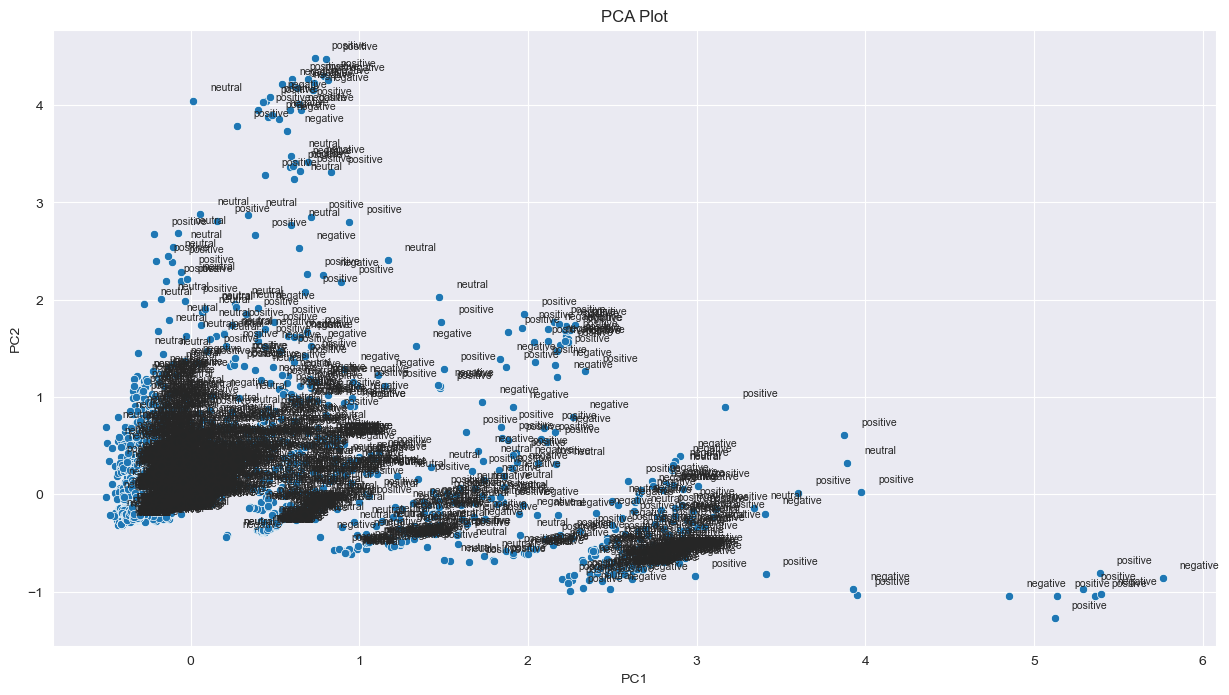

In [107]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=input_df, x="pca1", y="pca2")

for i, row in input_df.iterrows():
    plt.text(row["pca1"]+0.1, row["pca2"]+0.1, row["label"],size=7.5)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Plot")
plt.show()

In [111]:
tsne_components

array([[-26.155153  ,   0.15101747,   0.71145546],
       [  0.52742755,   2.3646019 ,  18.14567   ],
       [-26.129309  ,   0.02882079,   0.70684326],
       ...,
       [  3.9322991 ,  22.792198  ,  -0.84592646],
       [  4.4155316 ,  23.169577  ,   0.32326332],
       [ -9.461746  , -10.907918  ,   8.053857  ]], dtype=float32)

In [90]:
from sklearn.cluster import KMeans

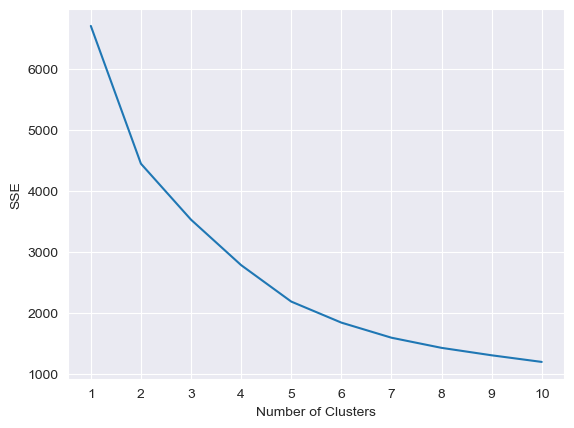

In [91]:
# Apply KMeans clustering and plot the elbow curve to determine the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_pca)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()
#From the elbow curve, we can either take 2 or 3 clusters

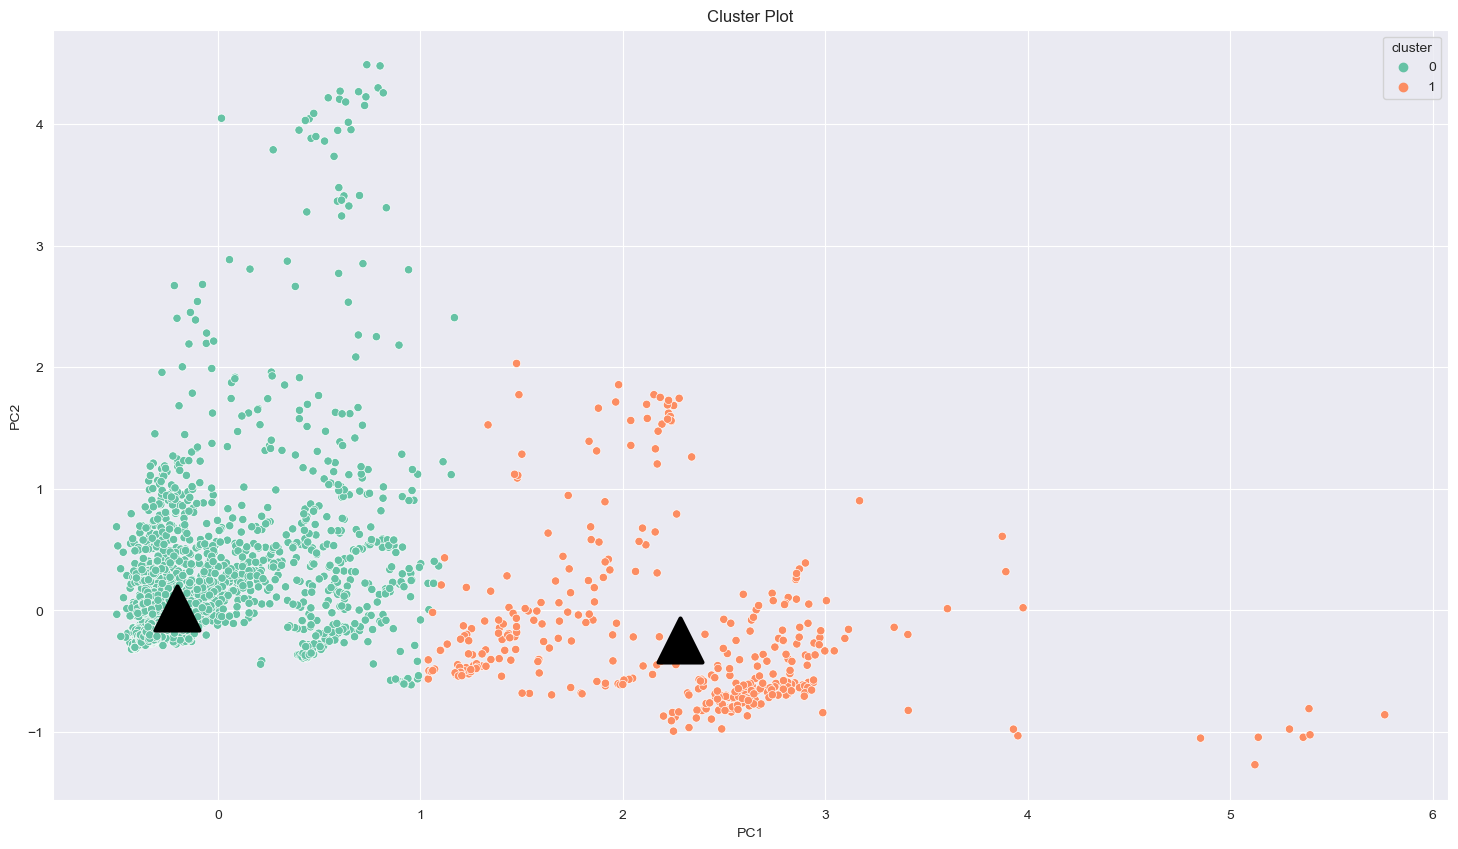

In [109]:
# Create a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=2, random_state=2023)


# Fit the model to the PCA components
kmeans.fit(input_df[['pca1', 'pca2']])
centroids = kmeans.cluster_centers_

# Assign cluster labels to each data point
input_df['cluster'] = kmeans.labels_

# Visualize the clusters using a scatter plot
plt.figure(figsize=(18, 10))
sns.scatterplot(data=input_df, x="pca1", y="pca2", hue="cluster", palette="Set2")
plt.scatter(centroids[:, 0], centroids[:, 1], marker="^", s=1000, linewidths=3, color="black")
plt.xlabel("PC1")
plt.ylabel("PC2")

# for i, label in enumerate(input_df["label"]):
#     plt.text(input_df.iloc[i, 2], input_df.iloc[i, 3], label, fontsize=7,rotation=25)

plt.title("Cluster Plot")
plt.show()

In [9]:
import numpy as np
a=np.log(0.5)

In [10]:
import math
math.e**a

0.5